<a href="https://colab.research.google.com/github/tgp989/Integracion-de-datos-y-prospectiva/blob/main/1_Caracterizaci%C3%B3n_VA_Clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gestión Riesgo Operacional - EVERGREEN**
En este espacio de trabajo se plantea como caso de estudio el análisis de los riesgos asociados a las operaciones del negocio de la Naviera EVERGREEN. Esta naviera Taiwanesa opera en 240 puertos alrededor del mundo utilizando 150 buques Canal de Panamá.
Los riesgos opercionales a los cuales esta expuesta la naviera están relacionados con la logistica portuaria frente a la carga y descarga de contenedores. De esta manera, este riesgo operacional se describe a través de dos variables aleatorias:
*  Frecuencia: Indica el número de contenedores que se quedan en tierra por semana (tiempo).
* Severidad (KUSD): Indica el costo de solucionar cada evento de de riesgo.
* Distribución Agregada de las Pérdidas: Producto entre la severidad y la frecuencia da como resultado la distribución agregada de las pérdidas (LDA - Loss Distribution Approach) y es precisamente que se hará la caracterización de esta distribución utilizando las medidas de tendencia de central (media, desviación) y las medidas de dispersión (coeficiente de asimetría, Kurtosis).

0. Cargar las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns #Esta libreria para el trabajo estadístico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los archivos de trabajo

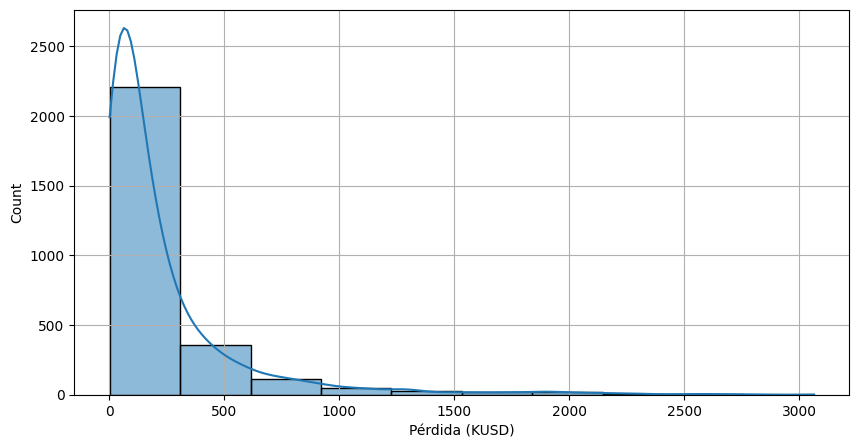

El número de datos por intervalo es:
[2209  356  116   46   27   18   20    7    4    1]
Los intervalos inferiores:
[   2.59919687  308.92945016  615.25970344  921.58995673 1227.92021002
 1534.25046331 1840.5807166  2146.91096988 2453.24122317 2759.57147646]
Los intervalos superiores:
[ 308.92945016  615.25970344  921.58995673 1227.92021002 1534.25046331
 1840.5807166  2146.91096988 2453.24122317 2759.57147646 3065.90172975]


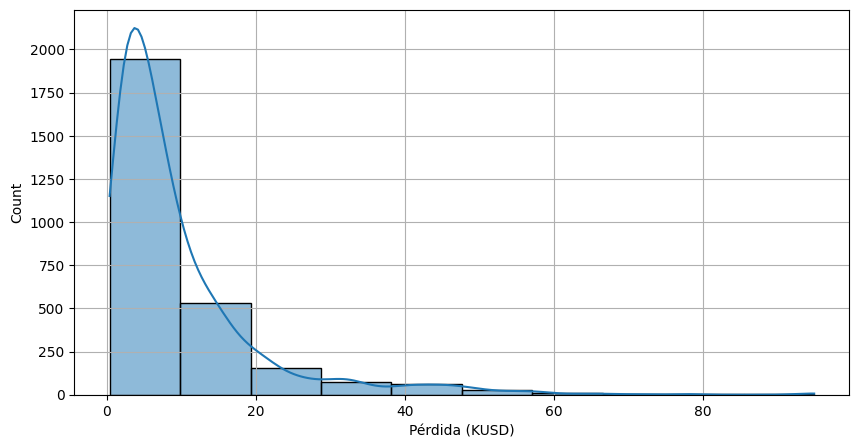

El número de datos por intervalo es:
[1942  534  153   71   60   26   10    2    2    4]
Los intervalos inferiores:
[ 0.39615279  9.8545091  19.31286541 28.77122172 38.22957803 47.68793435
 57.14629066 66.60464697 76.06300328 85.52135959]
Los intervalos superiores:
[ 9.8545091  19.31286541 28.77122172 38.22957803 47.68793435 57.14629066
 66.60464697 76.06300328 85.52135959 94.9797159 ]


In [ ]:
nxl='/content/drive/MyDrive/2. IntegraciónDatos(01-2026)/1. RiesgoOperacional_EVERGREEEN.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)

#Procedemos con la construcción de la distribución agregada de las pérdidas
Freq=XDB.iloc[:,1]
Sev=XDB.iloc[:,2]
LDA=Freq*Sev

#Se procede con la estimación de las propiedades estadísticas
p1,p2,p3,p4,df=caracterizacion(LDA)

#Ahora se puede obtener las propiedades de la variable severidad
p1,p2,p3,p4,df=caracterizacion(Sev)

2. Se procede con la clusterización estadística. La clusterización estadística esta definida por el Histograma de Frecuencias.

In [1]:
def caracterizacion(LDA):

  #Se procede con la creación de la distribución
  plt.figure(figsize=(10,5))
  sns.histplot(LDA,bins=10,kde=True)
  plt.xlabel("Pérdida (KUSD)")
  plt.grid()
  plt.show()

  #Se procede con la caracterización de cada una de las variables
  np.set_printoptions(suppress=True)
  NI=10    #Indica el número de clusters
  counts,bin_edges=np.histogram(LDA,bins=NI)
  print("El número de datos por intervalo es:")
  print(counts)
  print("Los intervalos inferiores:")
  print(bin_edges[:-1])
  print("Los intervalos superiores:")
  print(bin_edges[1:])
  XC=(bin_edges[:-1]+bin_edges[1:])/2

  #Se configura la tabla de los datos
  Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
  df=pd.DataFrame(Tabla,columns=['LI','LS','XC','ND'])
  df.head(10)

  #Se procede con la estimación de la media
  fr=counts/np.sum(counts)
  u=np.sum(XC*fr)
  sigma2=np.sum(fr*(XC-u)**2)
  sigma=np.sqrt(sigma2)
  Cas=np.sum(fr*(XC-u)**3)/sigma**3
  Kur=(np.sum(fr*(XC-u)**4)/sigma**4)-3

  return u,sigma,Cas,Kur,df

3. Se calcular las métricas estadísticas de tendencia central y dispersión: Media, Desviación, Asimetría y Kurtosis

In [ ]:

u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA) # Corrected: Calculate standard deviation of LDA

T2=np.column_stack((u,var,sigma))
df2=pd.DataFrame(T2,columns=['Media','Varianza','Desviacion'])
df2.head(1)

,Media,Varianza,Desviacion
0,231.266602,115581.511672,339.97281


In [ ]:
from scipy.stats import skew, kurtosis

# Calculate skewness
lda_skew = skew(LDA)

# Calculate kurtosis
lda_kurtosis = kurtosis(LDA)

# Optionally, add to the DataFrame with other metrics
df2_temp = df2.copy()
df2_temp['Asimetria'] = lda_skew
df2_temp['Kurtosis'] = lda_kurtosis

display(df2_temp)

Skewness (Asimetría) de LDA: 3.3891
Kurtosis de LDA: 14.5771


,Media,Varianza,Desviacion,Asimetria,Kurtosis
0,231.266602,115581.511672,339.97281,3.389058,14.577132


**Análisis de Resultados**
De las métricas de tendencia central y dispersión, podemos observar que los datos tienen la tendencia a ubicarse por debajo de la media como lo muestra el coeficiente de asimetría (3.3890), el cual esta por encima de la unidad, lo que indica que en general las pérdidas por dejar contenedores en tierra son pérdidas menores (pérdidas esperadas-no asegurables). Por su parte el coeficiente de curtosis, muestra que los datos se encuentran muy concentrados al lado izquierdo de la media de la distribución de las pérdidas, tal y como se puede observar en la gráfica del histograma de frecuencias. Esto refuerza la idea de menores pérdidas.